In [1]:
import requests
import pandas as pd
import datetime as dt
import praw

In [2]:
reddit = praw.Reddit(client_id = 's46cB0O1CjDLeg',
                    client_secret = 'OnU58KhDJdZzqgdpaDLfsSQ723PG9w',
                    password = '?xkk5^H,Q_ZaF+m',
                    user_agent = 'Personal use for keyword analysis.',
                    username = 'crownds18')

In [3]:
subreddit = reddit.subreddit('StockMarket')

In [4]:
#market_sub = subreddit.top()

In [5]:
market_sub = subreddit.top(limit=1000000)

In [6]:
for submission in subreddit.top(limit=1000000):
    print(submission.title, submission.id)

U/Deepfuckingvalue is having to testify in congress. While I hope he seeks legal advice. If he doesn't I hope his go to answer is...I like the stock. lchp3q
Historic recurrence ldg993
Just doing my part sir l9rstu
When in doubt, zoom out lxs16s
The stock market is easy nsws7o
Make it rain 💵💵 n30jed
Buy the dip they say.... ni3055
Average WSB user mnq0j0
WSB ruined investment based subs on Reddit. ldzd8u
I reached a milestone in my investing career today! msdb96
If you haven’t read Keith Gill’s (DFV) testimony yet. I guarantee these five pages are totally worth the read. lm57sy
it do be like dat tho lol mxs0pe
Don't want to spam r/StockMarket with GME I'd like to contain that in the relevant subreddits but I do think that this info should be widely known. Thank you lt5ell
After years of considering it, I finally opened a long position in Amazon today at 3:40 PM. Jeff Bezos resigned 25 minutes later. lbcd51
US airlines would not need the bailout if they didn't spend their recent enormous

In [7]:
topics_headers = { "title":[],
                "created": [], 
                "body":[]}

In [8]:
for submission in market_sub:
    topics_headers["title"].append(submission.title)
    topics_headers["created"].append(submission.created)
    topics_headers["body"].append(submission.selftext)

In [9]:
market_data = pd.DataFrame(topics_headers)

In [10]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [11]:
market_datetime = market_data["created"].apply(get_date)

In [12]:
market_df = market_data.assign(timestamp = market_datetime)

In [13]:
market_df.to_csv('market.csv', index=True)

In [14]:
market_df.set_index('timestamp')

,title,created,body
timestamp,,,
2021-02-04 16:11:27,U/Deepfuckingvalue is having to testify in con...,1.612480e+09,
2021-02-05 21:19:42,Historic recurrence,1.612585e+09,
2021-02-01 02:50:27,Just doing my part sir,1.612173e+09,
2021-03-04 19:49:05,"When in doubt, zoom out",1.614913e+09,
2021-06-05 15:21:10,The stock market is easy,1.622932e+09,
2021-05-02 07:19:53,Make it rain 💵💵,1.619965e+09,
2021-05-21 22:11:08,Buy the dip they say....,1.621660e+09,
2021-04-09 21:32:01,Average WSB user,1.618029e+09,
2021-02-06 16:08:02,WSB ruined investment based subs on Reddit.,1.612653e+09,You cant even post about moderate gains withou...


In [15]:
market_df['timestamp'] = pd.to_datetime(market_df['timestamp'], utc=True)

market_df.set_index('timestamp', inplace=True)

In [16]:
market_df.index = market_df.index.date


In [17]:
market_df

,title,created,body
2021-02-04,U/Deepfuckingvalue is having to testify in con...,1.612480e+09,
2021-02-05,Historic recurrence,1.612585e+09,
2021-02-01,Just doing my part sir,1.612173e+09,
2021-03-04,"When in doubt, zoom out",1.614913e+09,
2021-06-05,The stock market is easy,1.622932e+09,
2021-05-02,Make it rain 💵💵,1.619965e+09,
2021-05-21,Buy the dip they say....,1.621660e+09,
2021-04-09,Average WSB user,1.618029e+09,
2021-02-06,WSB ruined investment based subs on Reddit.,1.612653e+09,You cant even post about moderate gains withou...
2021-04-16,I reached a milestone in my investing career t...,1.618638e+09,


In [18]:
market_df.drop(columns = ['created', 'body'], inplace = True)
market_df

,title
2021-02-04,U/Deepfuckingvalue is having to testify in con...
2021-02-05,Historic recurrence
2021-02-01,Just doing my part sir
2021-03-04,"When in doubt, zoom out"
2021-06-05,The stock market is easy
2021-05-02,Make it rain 💵💵
2021-05-21,Buy the dip they say....
2021-04-09,Average WSB user
2021-02-06,WSB ruined investment based subs on Reddit.
2021-04-16,I reached a milestone in my investing career t...


In [19]:
market_df.to_csv('market.csv', index=False)

In [20]:
mylist = ['GME', 'GameStop', 'AMC', 'DOGE', 'Game Stop', 'Doge', 'amc', 'gme', 'gamestop']
pattern = '|'.join(mylist)

market_df['mentions'] = market_df.title.str.contains(pattern)
market_df

,title,mentions
2021-02-04,U/Deepfuckingvalue is having to testify in con...,False
2021-02-05,Historic recurrence,False
2021-02-01,Just doing my part sir,False
2021-03-04,"When in doubt, zoom out",False
2021-06-05,The stock market is easy,False
2021-05-02,Make it rain 💵💵,False
2021-05-21,Buy the dip they say....,False
2021-04-09,Average WSB user,False
2021-02-06,WSB ruined investment based subs on Reddit.,False
2021-04-16,I reached a milestone in my investing career t...,False


In [21]:
market_mentions = market_df.groupby(market_df.index)['mentions'].sum()
market_mentions

2017-11-05    0.0
2017-11-20    0.0
2017-12-07    0.0
2017-12-22    0.0
2018-01-16    0.0
2018-02-02    0.0
2018-02-05    0.0
2018-02-06    0.0
2018-02-08    0.0
2018-02-12    0.0
2018-02-18    0.0
2018-02-28    0.0
2018-03-01    0.0
2018-03-05    0.0
2018-03-07    0.0
2018-03-19    0.0
2018-03-22    0.0
2018-03-26    0.0
2018-03-27    0.0
2018-04-02    0.0
2018-04-05    0.0
2018-04-06    0.0
2018-05-19    0.0
2018-05-23    0.0
2018-06-01    0.0
2018-06-04    0.0
2018-06-07    0.0
2018-06-08    0.0
2018-06-10    0.0
2018-07-12    0.0
             ... 
2021-05-01    0.0
2021-05-02    0.0
2021-05-03    0.0
2021-05-04    0.0
2021-05-05    0.0
2021-05-06    0.0
2021-05-07    0.0
2021-05-08    0.0
2021-05-09    0.0
2021-05-10    0.0
2021-05-11    0.0
2021-05-12    0.0
2021-05-13    0.0
2021-05-14    0.0
2021-05-15    0.0
2021-05-16    0.0
2021-05-18    3.0
2021-05-21    0.0
2021-05-22    0.0
2021-05-23    0.0
2021-05-24    0.0
2021-05-26    0.0
2021-05-28    1.0
2021-05-29    0.0
2021-05-30

In [22]:
market_mentions.to_frame()

,mentions
2017-11-05,0.0
2017-11-20,0.0
2017-12-07,0.0
2017-12-22,0.0
2018-01-16,0.0
2018-02-02,0.0
2018-02-05,0.0
2018-02-06,0.0
2018-02-08,0.0
2018-02-12,0.0


In [23]:
market_mentions.index.isnull().sum()

0

In [24]:
market_mentions_plot = market_mentions
market_mentions_plot.index = pd.to_datetime(market_mentions_plot.index)
market_mentions_plot = market_mentions_plot.loc['2021-01-01':]

In [25]:
market_mentions_plot.index.dtype

dtype('<M8[ns]')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Stephan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\Stephan\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


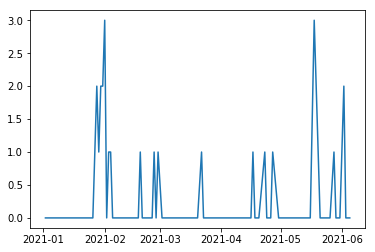

In [26]:
import matplotlib.pyplot as plt
plt.plot(market_mentions_plot[market_mentions_plot.index])